In [1]:
import random 
import math
import scipy
import numpy as np
import matplotlib.pyplot as plt
import library_data_science as lds

# The Central Limit Theorem (CLT)

Let us assume that for a certain population, we have selected a sufficiently large number of samples. Then, for each of them, we perform the same experiment, calculate the mean for each experiment, and record it. According to **the Central Limit Theorem (CLT)**, the resulting distribution of means **will always be normally distributed**.

* This normal distribution will have a mean close to the mean of the population. $$Mean(\text{means})\approx Mean(\text{population})$$

* The variance will be close to the variance of population divided by the sample size. $$Variance(\text{means})\approx \frac{Variance(\text{population})}{\text{sample.size}}$$

For example, I will test the distribution of means from 10,000 trials, each consisting of rolling a die 100 times.

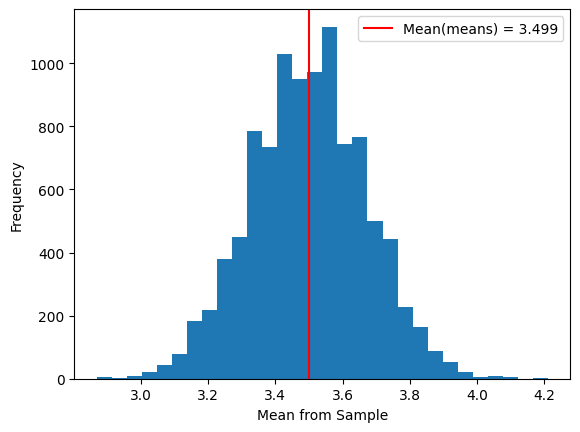

In [2]:
dice = [1, 2, 3, 4, 5, 6]
num_trials = 10000
sample_size = 100

means = []

for trial in range(num_trials):
    results = []

    for attempt in range(sample_size):
        results.append(random.choice(dice))
    
    trial_mean = lds.mean(results)
    means.append(trial_mean)

plt.hist(means, bins = 30)
plt.axvline(lds.mean(means), label = f'Mean(means) = {np.round(lds.mean(means), 3)}', color = 'red')
plt.xlabel('Mean from Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

As a result, I obtained a normal distribution.

Now, I will try something more challenging. I will generate the distribution of means by testing 1,000 exponential distributions.

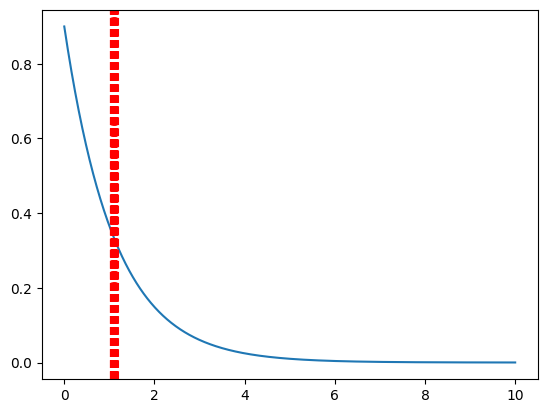

In [3]:
num_trials = 1000
l = 0.9
means = []

for attempt in range(num_trials):
    distribution = np.random.exponential(1 / l, size = 1000)
    distribution_mean = lds.mean(distribution)
    means.append(distribution_mean)

X = np.linspace(0, 10, num = 1000)
Y = [ lds.pdf_exponential(x, l) for x in X ]

plt.plot(X, Y)
[ plt.axvline(m, linestyle = '--', color = 'red') for m in means[::10]  ]
plt.show()

The plots depict the exponential distribution with $\lambda = 0.9$, with dashed lines indicating the selected means for the generated distributions. It looks as if a single thick dashed line has formed because most of the means are concentrated in that area.

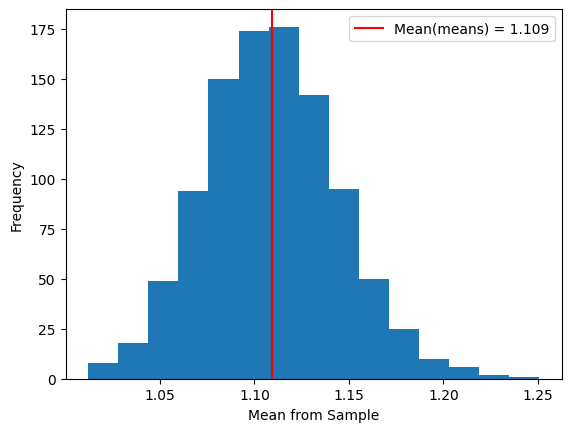

In [4]:
plt.hist(means, bins = 15)
plt.axvline(lds.mean(means), label = f'Mean(means) = {np.round(lds.mean(means), 3)}', color = 'red')
plt.xlabel('Mean from Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

Also as a result, I obtained a normal distribution.

The final experiment will involve testing 1,000 Monte Carlo simulations to generate the value of $\pi$.

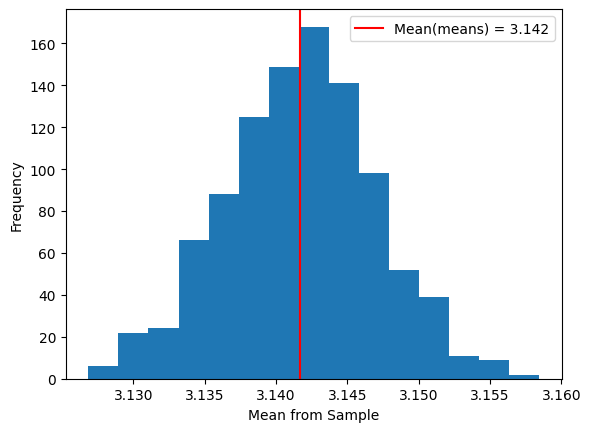

In [5]:
num_trials = 1000
num_points = 100000

results = []

for trial in range(num_trials):
    area = lds.area_monte_carlo(lambda x: (1 - x ** 2) ** 0.5, 0, 1, 0, 1, num_points = num_points)

    results.append(4 * area)

plt.hist(results, bins = 15)
plt.axvline(lds.mean(results), label = f'Mean(means) = {np.round(lds.mean(results), 3)}', color = 'red')
plt.xlabel('Mean from Sample')
plt.ylabel('Frequency')
plt.legend()
plt.show()

After conducting all three tests, I have tangible confirmation of the Central Limit Theorem (CLT).

# Standard Error

**The Standard Error** is referred to as the Standard Deviation for the distribution of the means of the experiment. The smaller standard error, the better approximation we get.

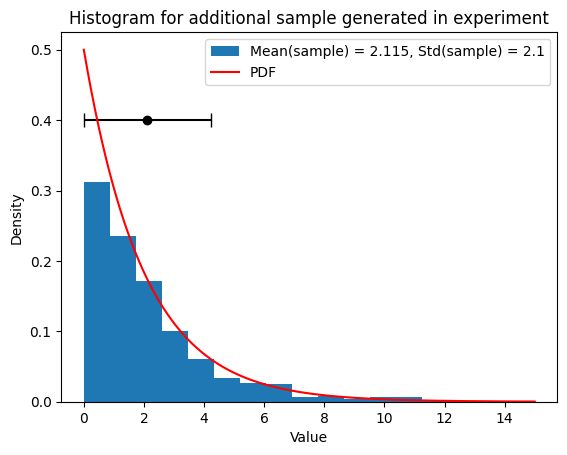

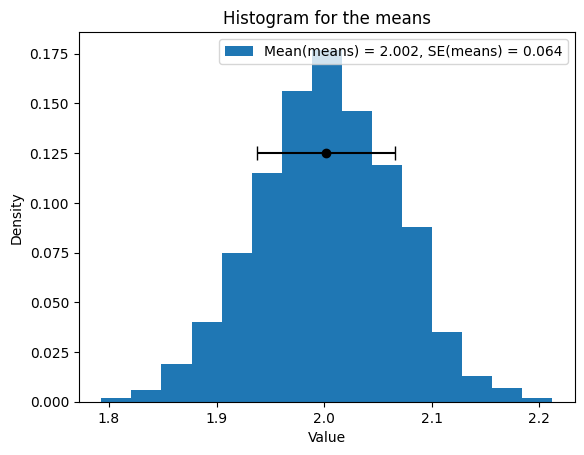

In [6]:
means = []

for attempt in range(1000):
    dist = np.random.exponential(1 / 0.5, size = 1000)
    means.append(lds.mean(dist))

    if attempt == 100:
        dist_mean = lds.mean(dist)
        dist_std = lds.std(dist)
        plt.hist(dist, bins = 15, weights = [ 1 / len(dist)] * len(dist), \
                 label = f'Mean(sample) = {np.round(dist_mean, 3)}, Std(sample) = {np.round(dist_std, 3)}')
        plt.errorbar(x = [ dist_mean ], y = [ 0.4 ], xerr = [ dist_std ], fmt = 'o', capsize = 5, color = 'black')

        X = np.linspace(0, 15, num = 1000)
        Y = [ lds.pdf_exponential(x, 0.5) for x in X ]

        plt.plot(X, Y, color = 'red', label = 'PDF')

        plt.title('Histogram for additional sample generated in experiment')
        plt.xlabel('Value')
        plt.ylabel('Density')
        plt.legend()
        plt.show()

means_mean = lds.mean(means)
means_std = lds.std(means)
plt.hist(means, bins = 15, weights = [ 1 / len(means)] * len(means), \
            label = f'Mean(means) = {np.round(means_mean, 3)}, SE(means) = {np.round(means_std, 3)}')
plt.errorbar(x = [ means_mean ], y = [ 0.125 ], xerr = [ means_std ], fmt = 'o', capsize = 5, color = 'black')

plt.title('Histogram for the means')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

I emphasize that in the case of a population or a sample, we refer to the **standard deviation** $Std(X)$, whereas when studying the distribution of means, we examine the **standard error** $SE(X)$.

### Standard Error with No Time-Consuming

Calculating the standard error requires significant computational time or, in the case of live studies, a substantial number of experimental repetitions. However, there is an almost cost-free method for calculating the standard error using only the entire population or a sample.

$$Standard\_Error(\text{sample}) = SE(\text{sample}) = \frac{Std(\text{sample})}{\sqrt{\text{sample.size}}}$$

When estimating the standard error from a sample, we must assume that the sample is **sufficiently representative** and **well-selected**.

In [7]:
def standard_error(sample: list):
    return lds.std(sample) / (len(sample) ** 0.5)


def se(sample: list):
    return standard_error(sample)

# Optimization of the Standard Error

At this point, two common facts should be established.

* More samples **will not change** the standard error.

* Larger samples **will change** the standard error.

To verify this, I will conduct two experiments involving the creation of a distribution of means for samples from an exponential distribution with $\lambda = 0.2$. In the first experiment, I will increase the number of samples, while in the second, I will increase the sample size and compare the error bars for each of them.

In [8]:
l = 0.2

### Experiment modifying the amount of samples

In [9]:
samples = [ 100, 200, 300, 400, 500, 600, 700, 800, 900 ]
size = 100

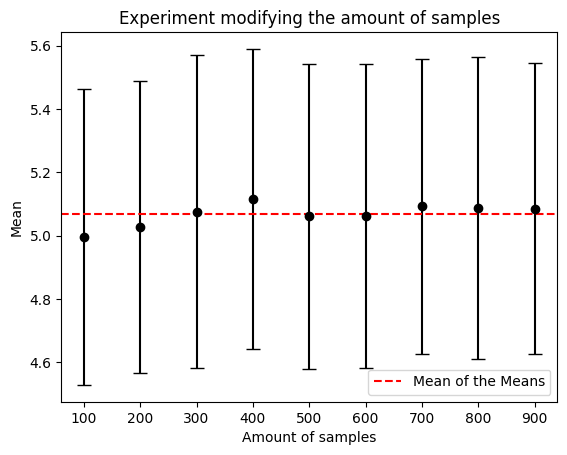

In [10]:
population = list(np.random.exponential(1 / l, size = 1000))

means = []
se_s = []

for num_samples in samples:
    dist_means = []

    for attempt in range(num_samples):
        sample = random.sample(population, size)
        dist_means.append(lds.mean(sample))
    
    means.append(lds.mean(dist_means))
    se_s.append(lds.std(dist_means))

plt.errorbar(
    x = samples,
    y = means,
    yerr = se_s,
    fmt = 'o', capsize = 5, color = 'black'
)

plt.title('Experiment modifying the amount of samples')
plt.xlabel('Amount of samples')
plt.ylabel('Mean')
plt.axhline(lds.mean(means), linestyle = '--', color = 'red', label = 'Mean of the Means')
plt.legend()
plt.show()

The experiment proves that the number of trials doesn't matter.

### Experiment modifying the sample size

In [11]:
samples = 100
sizes = [ 100, 200, 300, 400, 500, 600, 700, 800, 900 ]

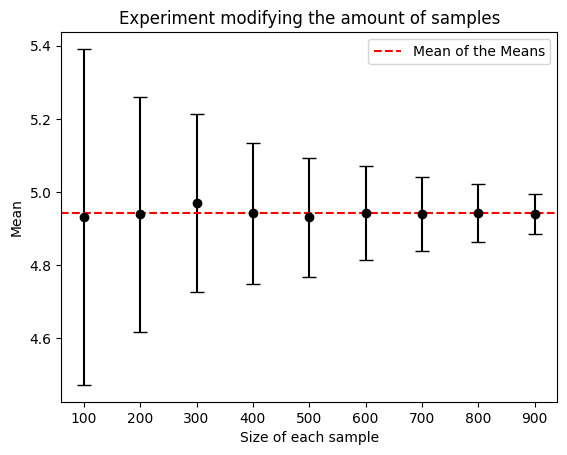

In [12]:
population = list(np.random.exponential(1 / l, size = 1000))

means = []
se_s = []

for size in sizes:
    dist_means = []

    for attempt in range(num_samples):
        sample = random.sample(population, size)
        dist_means.append(lds.mean(sample))
    
    means.append(lds.mean(dist_means))
    se_s.append(lds.std(dist_means))

plt.errorbar(
    x = sizes,
    y = means,
    yerr = se_s,
    fmt = 'o', capsize = 5, color = 'black'
)

plt.title('Experiment modifying the amount of samples')
plt.xlabel('Size of each sample')
plt.ylabel('Mean')
plt.axhline(lds.mean(means), linestyle = '--', color = 'red', label = 'Mean of the Means')
plt.legend()
plt.show()

The experiment clearly proves that it is the sample size that matters, not the number of trials.